In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_multiVI_embedding.h5ad")

In [4]:
endocrine_celltypes = [
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps/Delta progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [5]:
adata_red = adata[adata.obs["celltype"].isin(endocrine_celltypes)]

In [6]:
adata_removed = adata[~adata.obs["celltype"].isin(endocrine_celltypes)]

In [7]:
adata_removed.obs["celltype"].cat.categories

Index(['Ductal', 'Imm. Acinar', 'Mat. Acinar', 'Prlf. Ductal'], dtype='object')

In [8]:
adata_red.obs["celltype"].cat.categories

Index(['Alpha', 'Beta', 'Delta', 'Eps/Delta progenitors', 'Epsilon', 'Fev+',
       'Fev+ Alpha', 'Fev+ Beta', 'Fev+ Delta', 'Ngn3 high',
       'Ngn3 high cycling', 'Ngn3 low'],
      dtype='object')

In [9]:
adata = adata_red.copy()

In [10]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [11]:
adata

AnnData object with n_obs × n_vars = 9365 × 200535
    obs: 'batch_id', 'modality', '_scvi_batch', 'celltype', 'sample', 'time'
    var: 'n_cells', 'feature_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'multi_vi', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_multi_vi', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances', 'multi_vi_connectivities', 'multi_vi_distances'

In [59]:
sc.tl.leiden(adata, restrict_to=("celltype", ["Eps/Delta progenitors"]), resolution=0.5, key_added="tmp_1")


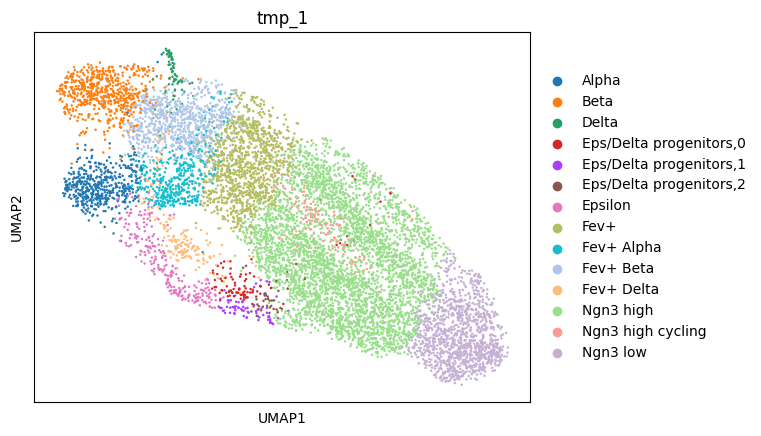

In [60]:
sc.pl.umap(adata, color="tmp_1")

In [61]:
sc.tl.leiden(adata, restrict_to=("tmp_1", ["Ngn3 high"]), resolution=0.5, key_added="tmp_2")


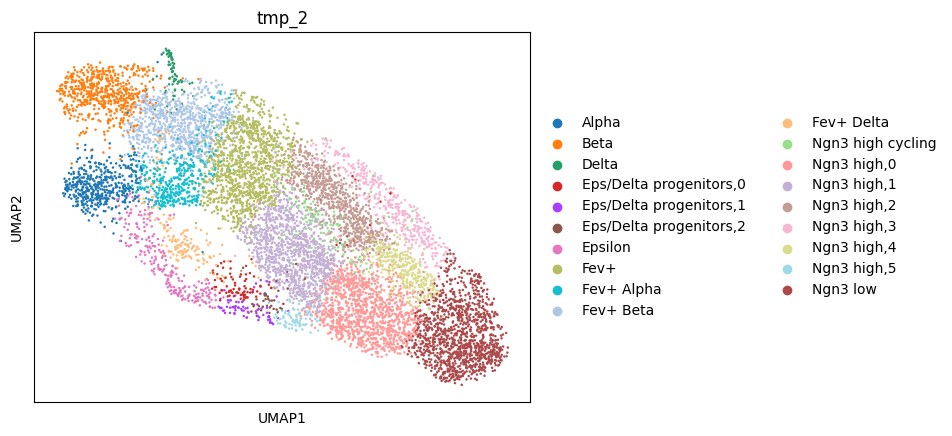

In [62]:
sc.pl.umap(adata, color="tmp_2")

In [63]:
adata.obs["celltype_refined"] = adata.obs["tmp_2"]

In [64]:
x,y = 'sample', 'celltype_refined'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

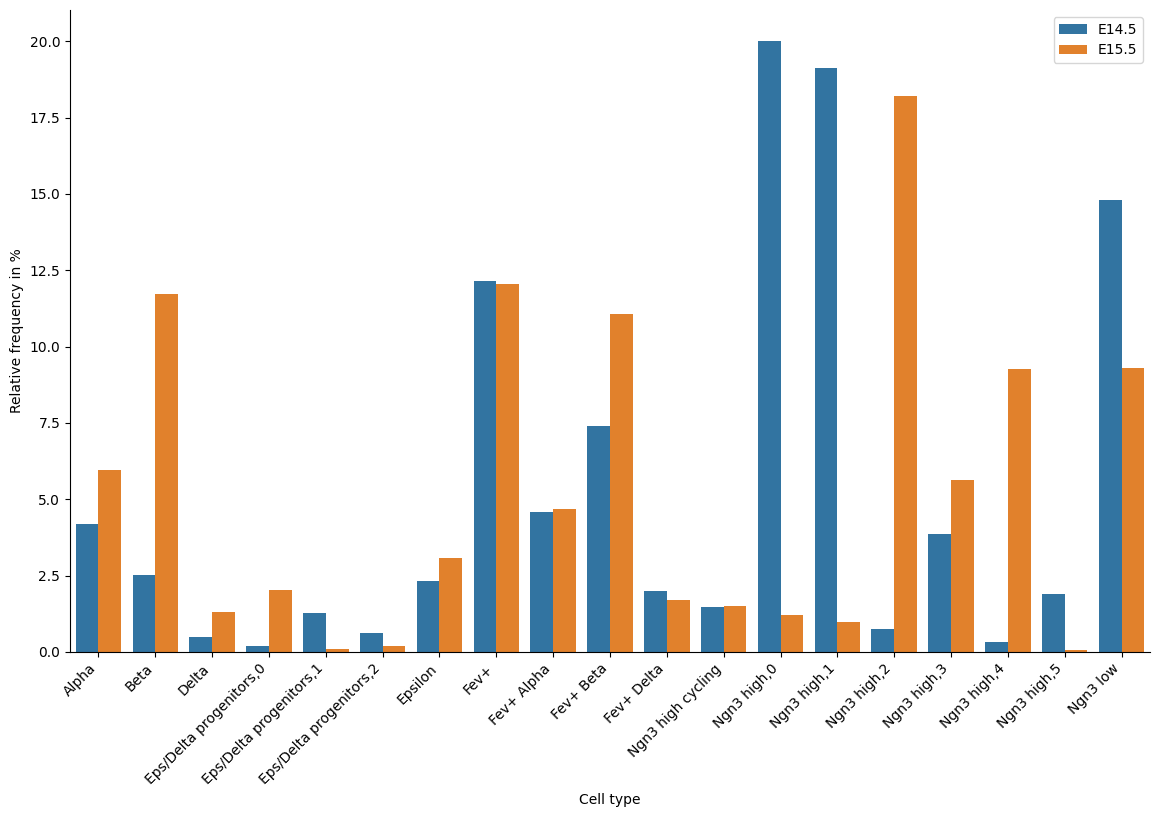

In [65]:
import seaborn as sns

g = sns.catplot(x="level_1",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()


# PCA on GEX+LSI space

In [66]:
tp0 = TemporalProblem(adata)
#tp0 = tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time", joint_attr="X_multi_vi")

In [ ]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean")

In [ ]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype_refined", late_annotation="celltype_refined", forward=True)

In [ ]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [ ]:
ct_desc = tp0.cell_transition(start=14.5, end=15.5, early_annotation="celltype_refined", late_annotation="celltype_refined", forward=False)

In [ ]:
mpl.cell_transition(tp0, dpi=100, fontsize=7)

In [ ]:
sc.pl.umap(adata, color="apoptosis")

In [26]:
tp0.push(14.5, 15.5, data="celltype_refined", subset="Fev+ Alpha")

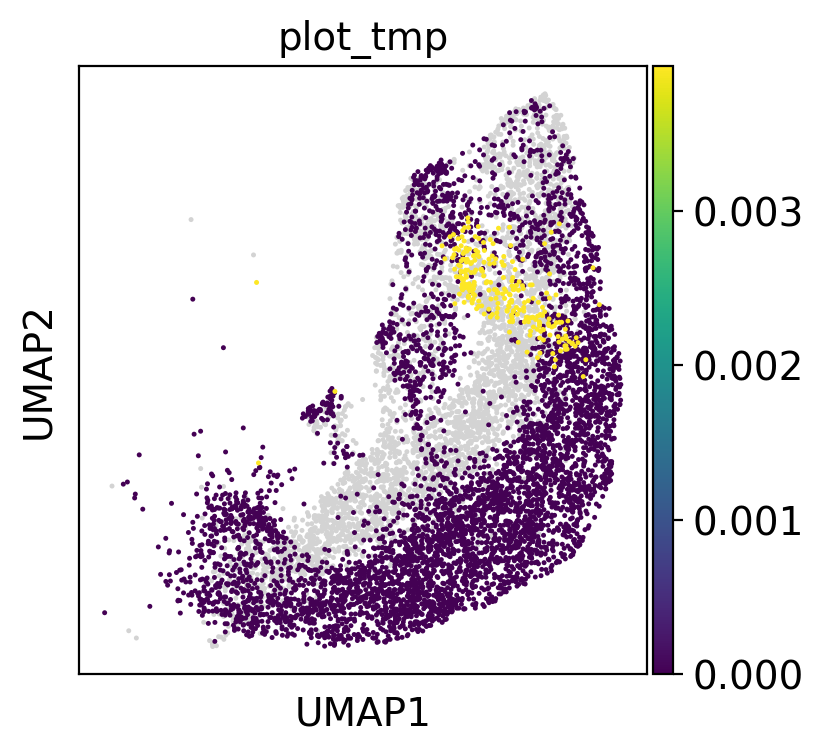

In [27]:
mpl.push(tp0, time_points=[14.5])

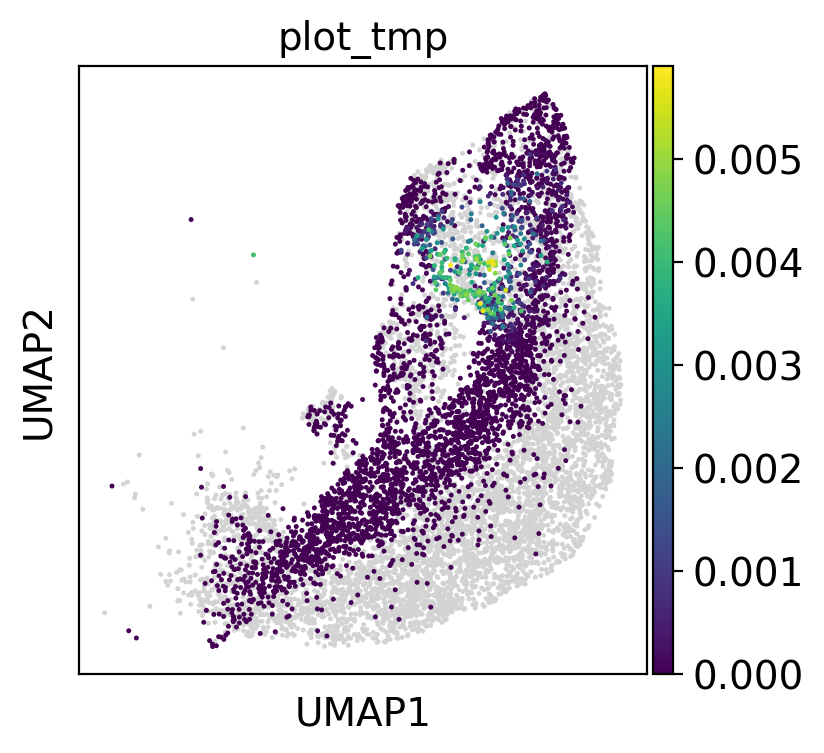

In [28]:
mpl.push(tp0, time_points=[15.5])

In [29]:
tp0.push(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

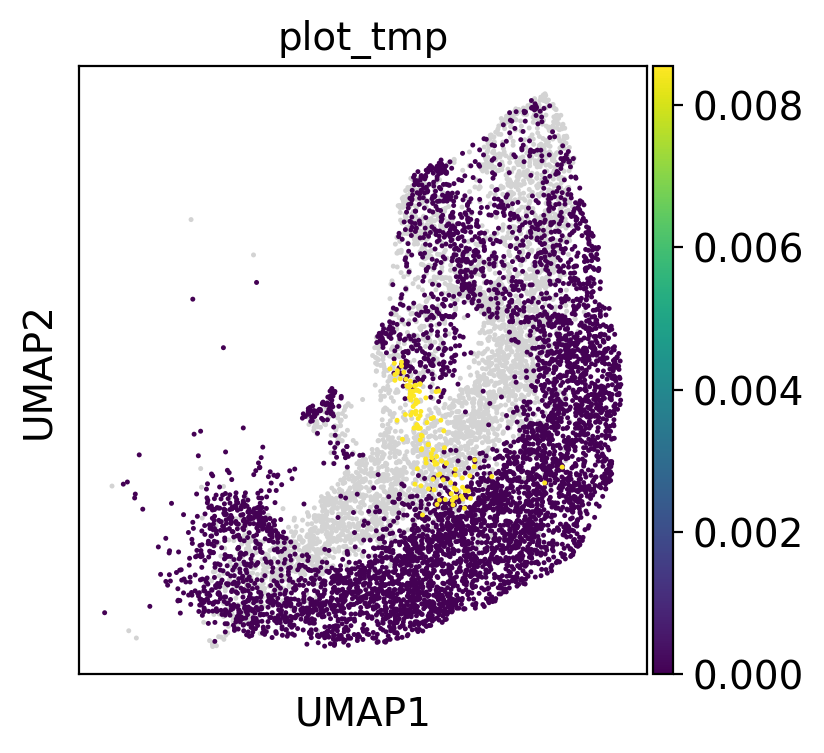

In [30]:
mpl.push(tp0, time_points=[14.5])

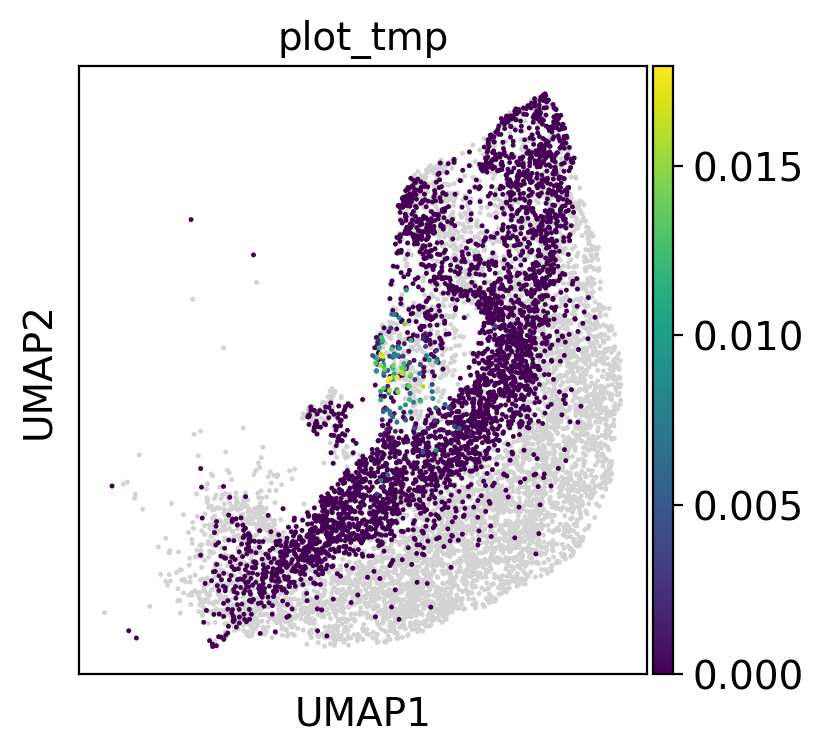

In [31]:
mpl.push(tp0, time_points=[15.5])

In [32]:
tp0.push(14.5, 15.5, data="celltype", subset="Epsilon")

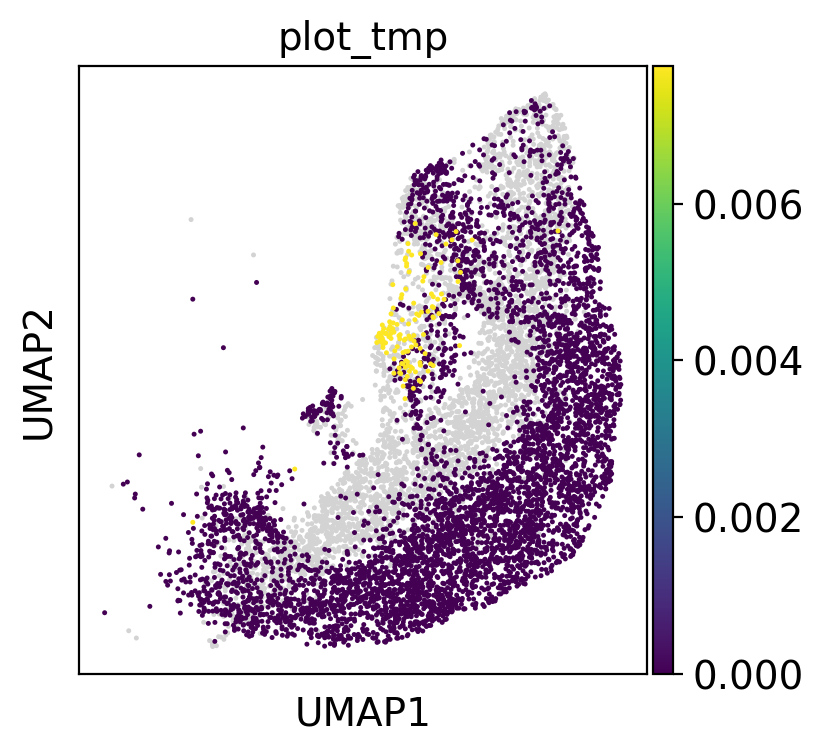

In [33]:
mpl.push(tp0, time_points=[14.5])

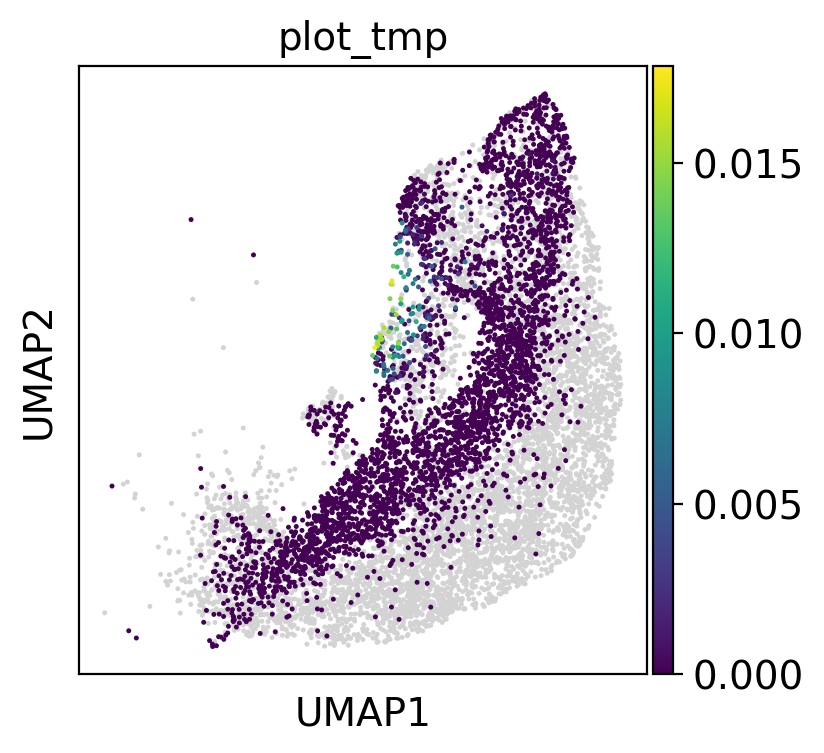

In [34]:
mpl.push(tp0, time_points=[15.5])

In [35]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps/Delta progenitors")

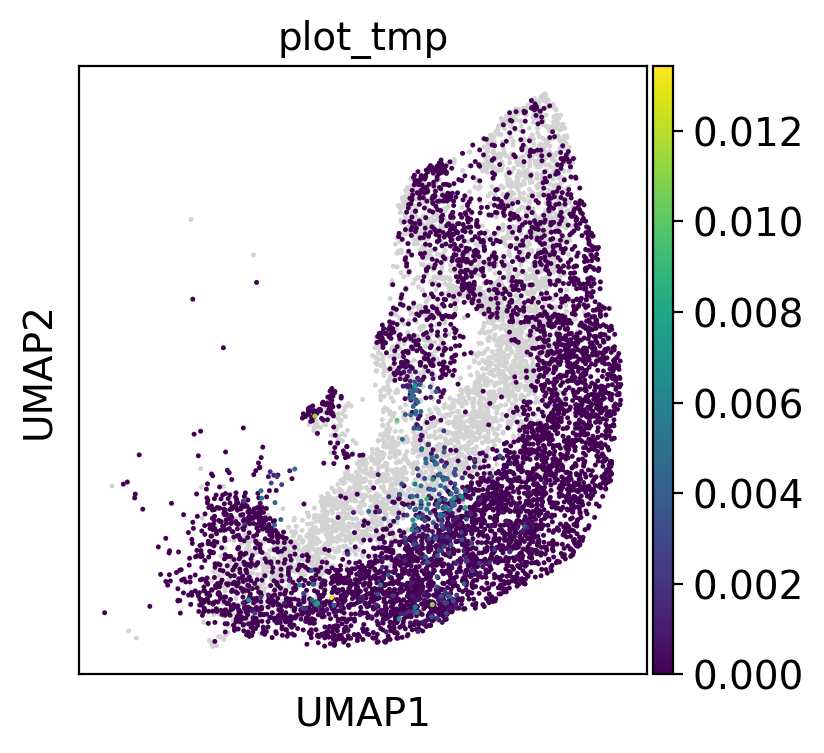

In [36]:
mpl.pull(tp0, time_points=[14.5])

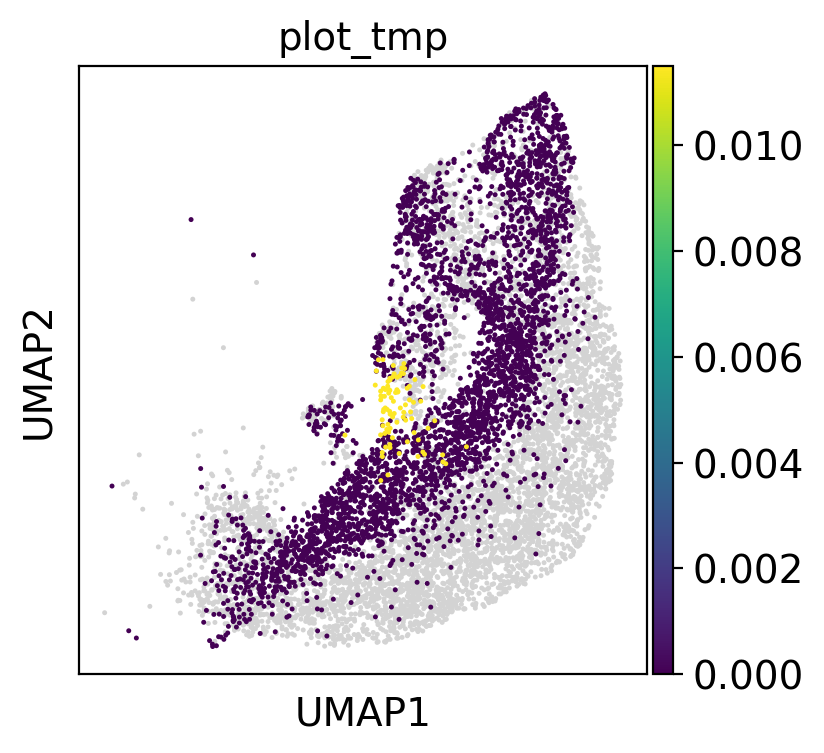

In [37]:
mpl.pull(tp0, time_points=[15.5])

In [38]:
adata

AnnData object with n_obs × n_vars = 9365 × 200535
    obs: 'batch_id', 'modality', '_scvi_batch', 'celltype', 'sample', 'time', 'proliferation', 'apoptosis', 'growth_rates', 'push', 'plot_tmp', 'pull'
    var: 'n_cells', 'feature_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'multi_vi', 'sample_colors', 'umap', 'moscot_results'
    obsm: 'X_multi_vi', 'X_umap'
    obsp: 'multi_vi_connectivities', 'multi_vi_distances'

In [2]:
import scanpy as sc

In [ ]:
adata_gex = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_2022.h5ad")

In [ ]:
adata_gex